<a href="https://colab.research.google.com/github/handhak0/dacon_JobTrend_visualization/blob/main/trend_keyword.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 모듈 불러오기

In [1]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

In [25]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existen

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [4]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [6]:
import pandas as pd
import numpy as np

import re

import warnings

warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt



from collections import Counter
from wordcloud import WordCloud

## 데이터 불러오기

In [7]:
import os 
os.chdir('/content/drive/MyDrive/프로젝트/데이콘')

In [8]:
os.getcwd()

'/content/drive/MyDrive/프로젝트/데이콘'

In [9]:
df_2020 = pd.read_csv('./data/news_2020.csv')
df_2021 = pd.read_csv('./data/news_2021.csv')

df_2020.drop('Unnamed: 0', axis = 1 , inplace = True)
df_2021.drop('Unnamed: 0', axis = 1 , inplace = True)

In [10]:
# 날짜 데이터 추출

def date_extraction(p) : 
  m = re.search('\d{4}.\d{2}', p)
  if m == None : 
      return '2021.12'
  else : 
   return m.group()

In [11]:
df_2020['date'] = df_2020.date.apply(lambda x : date_extraction(x))
df_2020

,title,date
0,"삼성이 키운 SW인재, 기업들 앞다퉈 채용",2020.12
1,"11번가, 예비 신입 개발자들과 '랜선 치킨미팅'",2020.12
2,'막말 논란' 열번 넘게 사과한 변창흠…아빠찬스·지인채용은 적극 반박,2020.12
3,"쏘카-타다, 경력 개발자 공개 채용",2020.12
4,IT개발자 꿈…문과생도 문제없죠,2020.12
...,...,...
4995,"언론사 떠난 디지털 인재들… ""기자만 의사결정? 그러면 혁신 못해요""",2020.09
4996,"유통업계, 2030 취향 저격하는 '라이브 방송'이 대세",2020.09
4997,"현대오토에버-이노베이션아카데미, 디지털 인재 육성 통한 소프트웨어 산업 발...",2020.09
4998,"당신이 놓친, 숨겨진 소프트웨어 개발 비용 5가지",2020.09


In [12]:
df_2021['date'] = df_2021.date.apply(lambda x : date_extraction(x))
df_2021

,title,date
0,"이마트 품에 안긴 이베이, 개발자 신규 채용 2배로 확대",2021.12
1,"크래프톤 美 스튜디오 SDS, 개발 인력 채용",2021.12
2,"카카오뱅크, 채용전환형 개발자 인턴 모집…""내년 4월 정식 채용""",2021.12
3,"롯데 'IT개발자' 모시기 대규모 채용…신세계, 이베이 M&A효과 조직개편 '박차...",2021.12
4,시중은행 ‘만 41세’도 희망퇴직자...인터넷은행은 대규모 ‘개발자’ 채용,2021.12
...,...,...
4995,"스마일게이트 스토브, 채용연계형 인턴십 '스토브 개발캠프' 2기 모집",2021.09
4996,"[취업정보] '삼성청년SW아카데미' 누적 2,000명 취업..교육부터 취업까지 종합...",2021.12
4997,"메쉬코리아 부릉, 31일까지 IT 인재 공개 채용",2021.10
4998,‘삼성청년SW아카데미’ 5기 수료식 성료…3년새 대기업 2000명 취업,2021.12


In [13]:
df_2020['year'] = df_2020['date'].str[:4].astype(int)
df_2020['month'] = df_2020['date'].str[5:7].astype(int)
df_2020

,title,date,year,month
0,"삼성이 키운 SW인재, 기업들 앞다퉈 채용",2020.12,2020,12
1,"11번가, 예비 신입 개발자들과 '랜선 치킨미팅'",2020.12,2020,12
2,'막말 논란' 열번 넘게 사과한 변창흠…아빠찬스·지인채용은 적극 반박,2020.12,2020,12
3,"쏘카-타다, 경력 개발자 공개 채용",2020.12,2020,12
4,IT개발자 꿈…문과생도 문제없죠,2020.12,2020,12
...,...,...,...,...
4995,"언론사 떠난 디지털 인재들… ""기자만 의사결정? 그러면 혁신 못해요""",2020.09,2020,9
4996,"유통업계, 2030 취향 저격하는 '라이브 방송'이 대세",2020.09,2020,9
4997,"현대오토에버-이노베이션아카데미, 디지털 인재 육성 통한 소프트웨어 산업 발...",2020.09,2020,9
4998,"당신이 놓친, 숨겨진 소프트웨어 개발 비용 5가지",2020.09,2020,9


In [14]:
df_2021['year'] = df_2021['date'].str[:4].astype(int)
df_2021['month'] = df_2021['date'].str[5:7].astype(int)
df_2021

,title,date,year,month
0,"이마트 품에 안긴 이베이, 개발자 신규 채용 2배로 확대",2021.12,2021,12
1,"크래프톤 美 스튜디오 SDS, 개발 인력 채용",2021.12,2021,12
2,"카카오뱅크, 채용전환형 개발자 인턴 모집…""내년 4월 정식 채용""",2021.12,2021,12
3,"롯데 'IT개발자' 모시기 대규모 채용…신세계, 이베이 M&A효과 조직개편 '박차...",2021.12,2021,12
4,시중은행 ‘만 41세’도 희망퇴직자...인터넷은행은 대규모 ‘개발자’ 채용,2021.12,2021,12
...,...,...,...,...
4995,"스마일게이트 스토브, 채용연계형 인턴십 '스토브 개발캠프' 2기 모집",2021.09,2021,9
4996,"[취업정보] '삼성청년SW아카데미' 누적 2,000명 취업..교육부터 취업까지 종합...",2021.12,2021,12
4997,"메쉬코리아 부릉, 31일까지 IT 인재 공개 채용",2021.10,2021,10
4998,‘삼성청년SW아카데미’ 5기 수료식 성료…3년새 대기업 2000명 취업,2021.12,2021,12


## 자연어 처리

### 토큰화
- mecab 사용 [참고](https://sanghyu.tistory.com/170)

In [16]:
df_2020['title'] = df_2020['title'].str.replace('…', ' ')
for i in range(df_2020.shape[0]) : 
 df_2020['title'][i] = df_2020['title'][i].replace('...', ' ')

In [19]:
def apply_mecab(text) : 
  nouns = mecab.morphs(text)
  nouns = [n for n in nouns if len(n) > 1]
  return nouns

In [20]:
def apply_split(text) : 
  nouns = text.split()
  nouns = [n for n in nouns if len(n) > 1]
  return nouns 

In [21]:
df_2020['mecab'] = df_2020['title'].apply(lambda x : apply_mecab(x))
df_2020['split'] = df_2020['title'].apply(lambda x : apply_split(x))

df_2020

,title,date,year,month,mecab,split
0,"삼성이 키운 SW인재, 기업들 앞다퉈 채용",2020.12,2020,12,"[삼성, 키운, SW, 인재, 기업, 다퉈, 채용]","[삼성이, 키운, SW인재,, 기업들, 앞다퉈, 채용]"
1,"11번가, 예비 신입 개발자들과 '랜선 치킨미팅'",2020.12,2020,12,"[11, 예비, 신입, 개발자, 치킨, 미팅]","[11번가,, 예비, 신입, 개발자들과, '랜선, 치킨미팅']"
2,'막말 논란' 열번 넘게 사과한 변창흠 아빠찬스·지인채용은 적극 반박,2020.12,2020,12,"[막말, 논란, 사과, 변창흠, 아빠, 찬스, 지인, 채용, 적극, 반박]","['막말, 논란', 열번, 넘게, 사과한, 변창흠, 아빠찬스·지인채용은, 적극, 반박]"
3,"쏘카-타다, 경력 개발자 공개 채용",2020.12,2020,12,"[경력, 개발자, 공개, 채용]","[쏘카-타다,, 경력, 개발자, 공개, 채용]"
4,IT개발자 꿈 문과생도 문제없죠,2020.12,2020,12,"[IT, 개발자, 문과, 문제없]","[IT개발자, 문과생도, 문제없죠]"
...,...,...,...,...,...,...
4995,"언론사 떠난 디지털 인재들 ""기자만 의사결정? 그러면 혁신 못해요""",2020.09,2020,9,"[언론사, 떠난, 디지털, 인재, 기자, 의사, 결정, 그러면, 혁신, 해요]","[언론사, 떠난, 디지털, 인재들, ""기자만, 의사결정?, 그러면, 혁신, 못해요""]"
4996,"유통업계, 2030 취향 저격하는 '라이브 방송'이 대세",2020.09,2020,9,"[유통, 업계, 2030, 취향, 저격, 라이브, 방송, 대세]","[유통업계,, 2030, 취향, 저격하는, '라이브, 방송'이, 대세]"
4997,"현대오토에버-이노베이션아카데미, 디지털 인재 육성 통한 소프트웨어 산업 발",2020.09,2020,9,"[현대, 오토, 에버, 이노베이션, 아카데미, 디지털, 인재, 육성, 통한, 소프트...","[현대오토에버-이노베이션아카데미,, 디지털, 인재, 육성, 통한, 소프트웨어, 산업]"
4998,"당신이 놓친, 숨겨진 소프트웨어 개발 비용 5가지",2020.09,2020,9,"[당신, 놓친, 숨겨진, 소프트웨어, 개발, 비용, 가지]","[당신이, 놓친,, 숨겨진, 소프트웨어, 개발, 비용, 5가지]"


## 2021

In [39]:
df_2021['title'] = df_2021['title'].str.replace('…', ' ')
for i in range(df_2021.shape[0]) : 
 df_2021['title'][i] = df_2021['title'][i].replace('...', ' ')

In [40]:
df_2021['mecab'] = df_2021['title'].apply(lambda x : apply_mecab(x))
df_2021['split'] = df_2021['title'].apply(lambda x : apply_split(x))

df_2021

,title,date,year,month,mecab,split
0,"이마트 품에 안긴 이베이, 개발자 신규 채용 2배로 확대",2021.12,2021,12,"[이마트, 안긴, 이베이, 개발자, 신규, 채용, 확대]","[이마트, 품에, 안긴, 이베이,, 개발자, 신규, 채용, 2배로, 확대]"
1,"크래프톤 美 스튜디오 SDS, 개발 인력 채용",2021.12,2021,12,"[래프, 스튜디오, SDS, 개발, 인력, 채용]","[크래프톤, 스튜디오, SDS,, 개발, 인력, 채용]"
2,"카카오뱅크, 채용전환형 개발자 인턴 모집 ""내년 4월 정식 채용""",2021.12,2021,12,"[카카오, 뱅크, 채용, 전환, 개발자, 인턴, 모집, 내년, 정식, 채용]","[카카오뱅크,, 채용전환형, 개발자, 인턴, 모집, ""내년, 4월, 정식, 채용""]"
3,"롯데 'IT개발자' 모시기 대규모 채용 신세계, 이베이 M&A효과 조직개편 '박차",2021.12,2021,12,"[롯데, IT, 개발자, 모시, 규모, 채용, 신세계, 이베이, 효과, 조직, 개편...","[롯데, 'IT개발자', 모시기, 대규모, 채용, 신세계,, 이베이, M&A효과, ..."
4,시중은행 ‘만 41세’도 희망퇴직자 인터넷은행은 대규모 ‘개발자’ 채용,2021.12,2021,12,"[시중, 은행, 41, 희망, 퇴직자, 인터넷, 은행, 규모, 개발자, 채용]","[시중은행, ‘만, 41세’도, 희망퇴직자, 인터넷은행은, 대규모, ‘개발자’, 채용]"
...,...,...,...,...,...,...
4995,"스마일게이트 스토브, 채용연계형 인턴십 '스토브 개발캠프' 2기 모집",2021.09,2021,9,"[스마일게이트, 스토브, 채용, 연계, 인턴, 스토브, 개발, 캠프, 모집]","[스마일게이트, 스토브,, 채용연계형, 인턴십, '스토브, 개발캠프', 2기, 모집]"
4996,"[취업정보] '삼성청년SW아카데미' 누적 2,000명 취업..교육부터 취업까지 종합",2021.12,2021,12,"[취업, 정보, 삼성, 청년, SW, 아카데미, 누적, 000, 취업, 교육, 부터...","[[취업정보], '삼성청년SW아카데미', 누적, 2,000명, 취업..교육부터, 취..."
4997,"메쉬코리아 부릉, 31일까지 IT 인재 공개 채용",2021.10,2021,10,"[코리아, 부릉, 31, 까지, IT, 인재, 공개, 채용]","[메쉬코리아, 부릉,, 31일까지, IT, 인재, 공개, 채용]"
4998,‘삼성청년SW아카데미’ 5기 수료식 성료 3년새 대기업 2000명 취업,2021.12,2021,12,"[삼성, 청년, SW, 아카데미, 수료식, 기업, 2000, 취업]","[‘삼성청년SW아카데미’, 5기, 수료식, 성료, 3년새, 대기업, 2000명, 취업]"


In [44]:
total = []

for i in df_2021['mecab'] : 
  total += i

count = Counter(total)
tags = count.most_common(40)
tags = tags[2:]

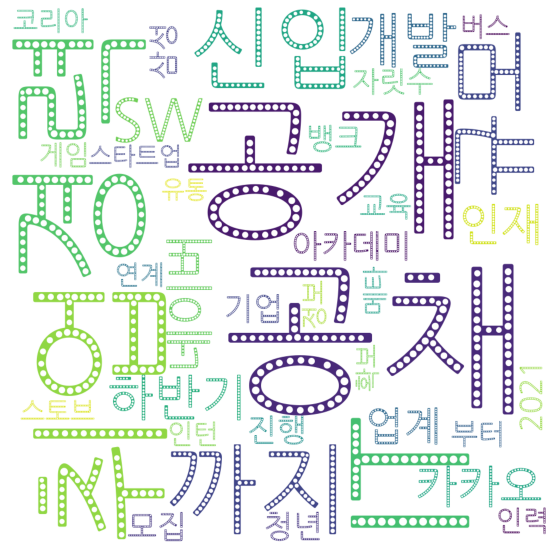

In [45]:
wc = WordCloud(font_path=font,\
		background_color="white", \
		width=1000, \
		height=1000, \
		max_words=100, \
		max_font_size=300)
wc = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off', interpolation='bilinear')
plt.show()

In [47]:
total = []

for i in df_2021['split'] : 
  total += i

count = Counter(total)
tags = count.most_common(40)
tags = tags[2:]

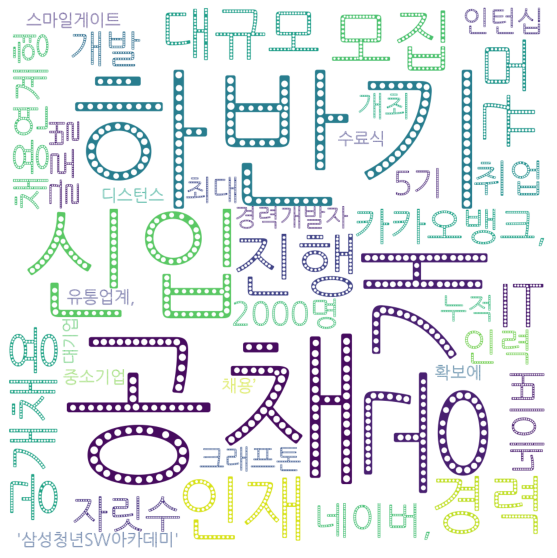

In [48]:
wc = WordCloud(font_path=font,\
		background_color="white", \
		width=1000, \
		height=1000, \
		max_words=100, \
		max_font_size=300)
wc = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off', interpolation='bilinear')
plt.show()

In [49]:
tags

[('공채', 498),
 ('하반기', 420),
 ('공개', 344),
 ('신입', 320),
 ('인재', 312),
 ('진행', 301),
 ('모집', 277),
 ('경력', 249),
 ('규모', 220),
 ('IT', 219),
 ('대규모', 201),
 ('공개채용', 172),
 ('카카오뱅크,', 169),
 ('채용연계형', 169),
 ('자릿수', 167),
 ('개발', 160),
 ('인력', 160),
 ('네이버,', 160),
 ('취업', 159),
 ('네이버', 153),
 ('2000명', 143),
 ('5기', 143),
 ('글로벌', 142),
 ('인턴십', 140),
 ('누적', 138),
 ('개최', 137),
 ('최대', 135),
 ('크래프톤', 127),
 ('경력개발자', 127),
 ("'삼성청년SW아카데미'", 127),
 ('유통업계,', 125),
 ('중소기업', 122),
 ('확보에', 120),
 ('수료식', 120),
 ('대기업', 119),
 ('디스턴스', 117),
 ('채용’', 116),
 ('스마일게이트', 116)]

In [ ]:
# 폰트 설정 
font = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 전체 태그 담을 곳 
li_tags = []

In [ ]:
# 태그 담기 
total = []
for i in df_2021['split'] : # df_2020['mecab] ~ df_2021['split']
  total += i

count1 = Counter(total)

tags = count1.most_common(40)
tags = tags[2:]

li_tags.append(tags)

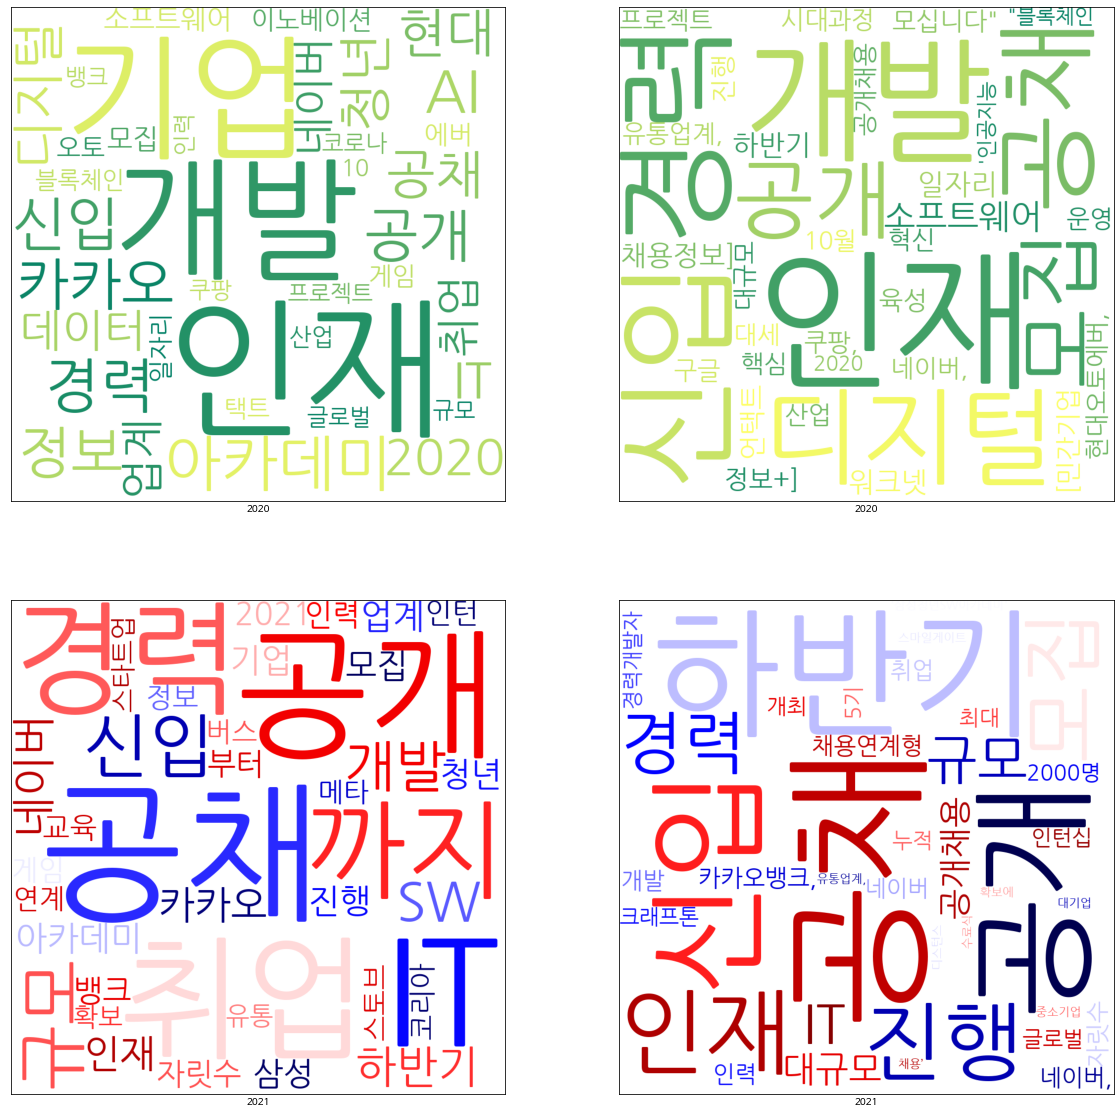

In [74]:
# 그래프 

fig = plt.figure(figsize = (20,20))

rows = 2
cols = 2

i = 1


xlabels = ["xlabel", "2020", "2020", "2021", "2021"]
palettes = ['summer', 'summer', 'seismic','seismic']

for tag in li_tags : 
  wc = WordCloud(font_path=font,\
		background_color="white", \
		width=1000, \
		height=1000, \
		max_words=100, \
		max_font_size=300,
    colormap = palettes[i-1])
  wc = wc.generate_from_frequencies(dict(tag))


  ax = fig.add_subplot(rows, cols, i)
  ax.imshow(wc)
  ax.set_xlabel(xlabels[i])
  # ax.axis('off', interpolation='bilinear')
  ax.set_xticks([]), ax.set_yticks([])
  i+=1

# plt.show()
plt.savefig('news.png')

In [76]:
os.getcwd()

'/content/drive/My Drive/프로젝트/데이콘'

In [ ]:
! git clone 